**Modern Portfolio Theory (MPT)**

This notebook is a quick illustration of how Empyrial can be used for obtaining the optimal allocations.

In the example below, we pick some stocks and benchmark it against the S&P500. We are using SPY as it's the next-alternative 

(as opposed to trying to come up with our own allocations).



In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd

**Parameter values:** <1>
* start_date = 2020-01-01; it's discretionary (Note 1)
* portfolio = List of string of symbols. Here, it's just a selection of large caps. 
* optimizer = "MINVAR" - Applying MPT with objective to minimize portfolio variance
* rebalance = once per quarter

Note 1: For "start_date" - Although academic studies suggest 12-months is the ideal lookback period for backtesting, the choice of it may rather be arbitrary. It can be argued that trying to find a best fitted start-end date for strategies over historical data may be counter productive. <2> 

In [3]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_2yrs_ago = pd.to_datetime(date_today) - pd.DateOffset(months=25)
date_2yrs_ago = date_2yrs_ago.strftime("%Y-%m-%d")
date_2yrs_ago

'2021-09-02'

In [8]:
portfolio = Engine(
    start_date = date_2yrs_ago,                                      
    portfolio = ["AAPL","JNJ","KO","MRK","PFE","PM","TSM", "MSFT", "MCD", "TSLA" ],
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

# Summary:

Start date: 2021-09-02
End date: 2023-10-02


,Backtest
,
Annual return,3.63%
Cumulative return,7.66%
Annual volatility,15.73 %
Winning day ratio,49.9%
Sharpe ratio,0.31
Calmar ratio,0.22
Information ratio,0.0
Stability,0.28
Max Drawdown,-16.57 %


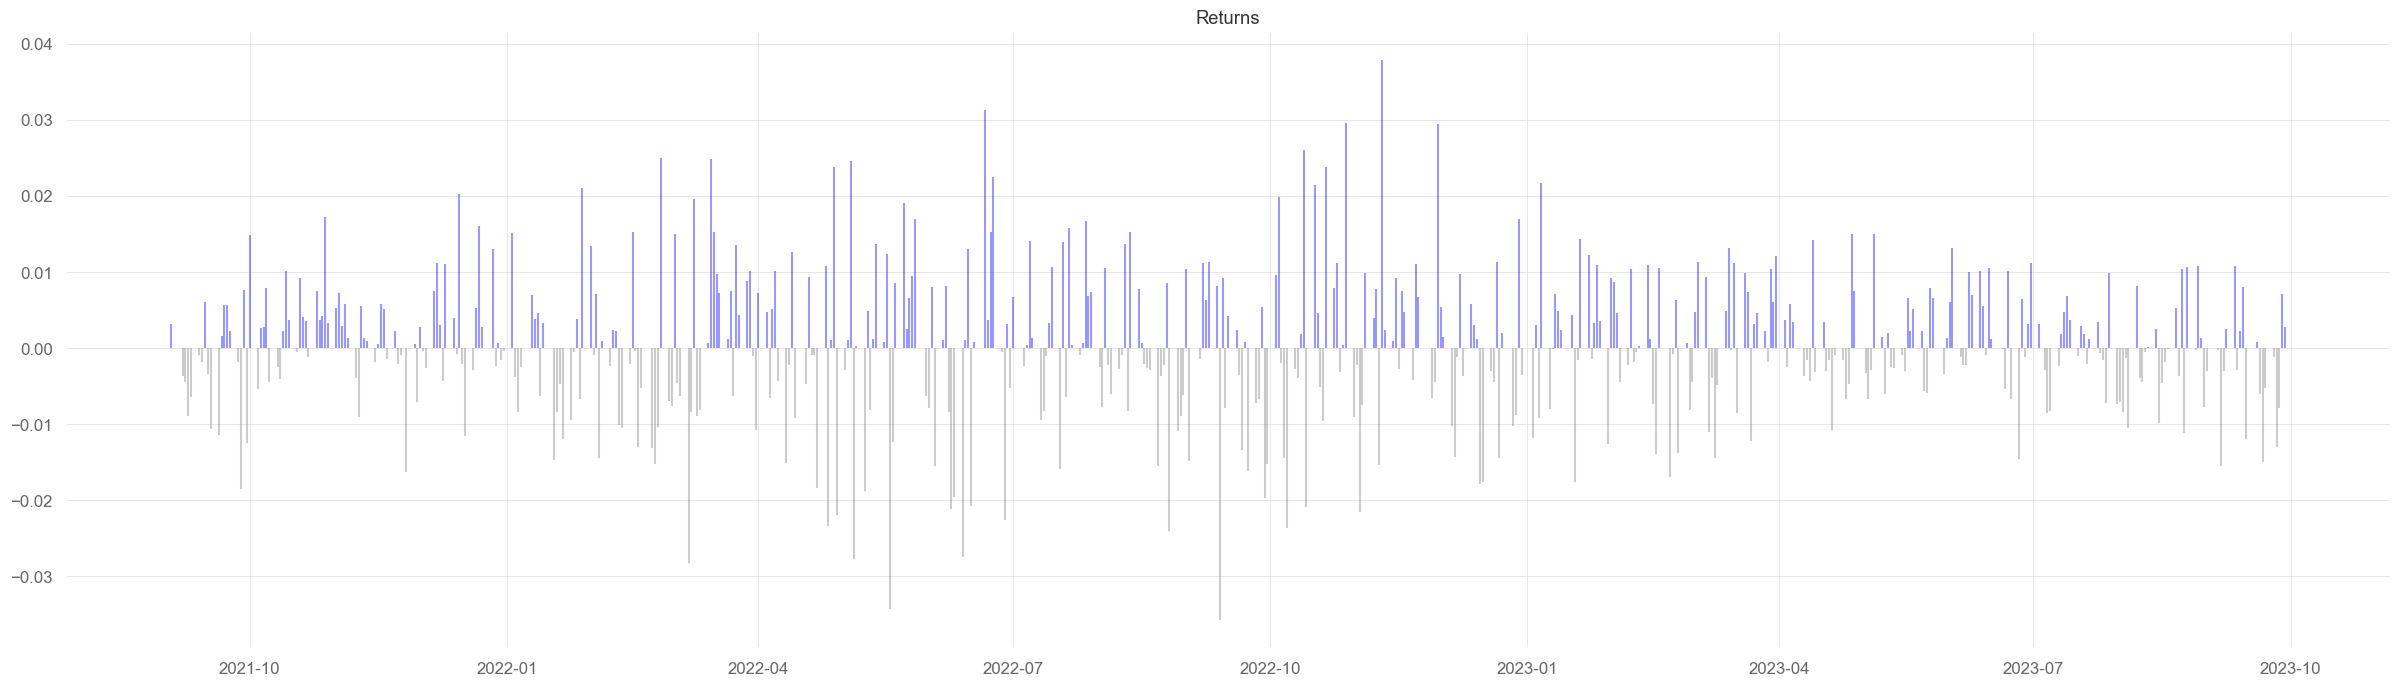

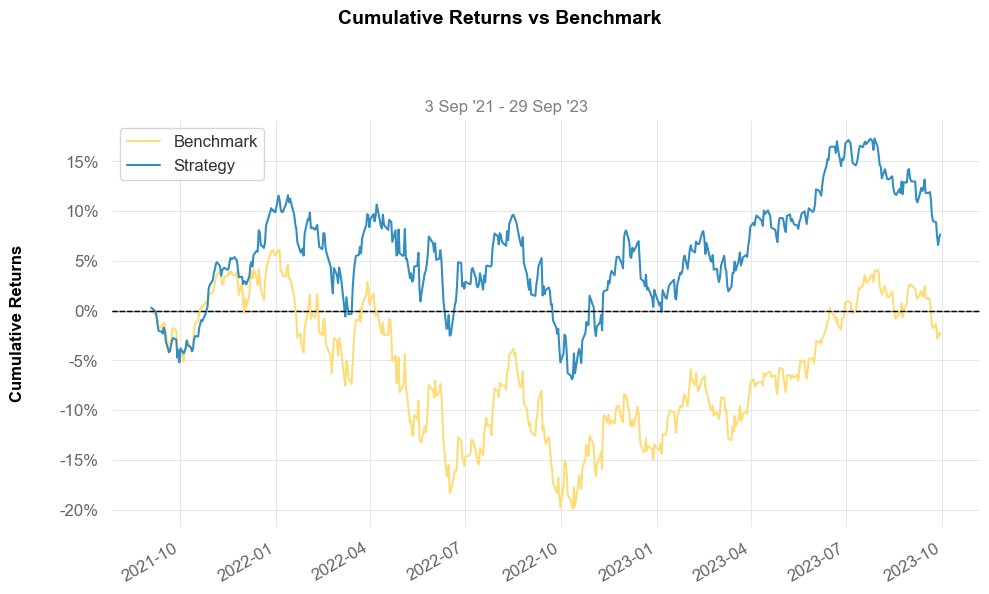

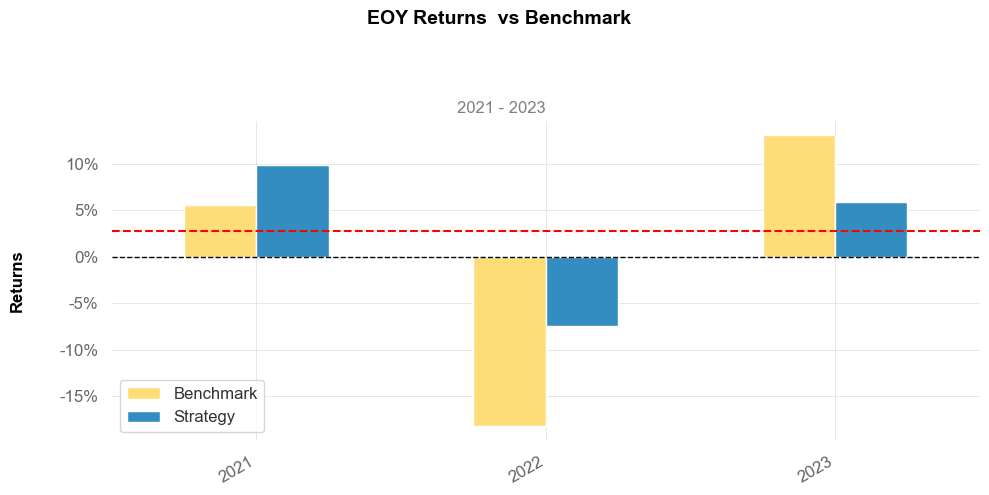

TypeError:  pivot() takes 1 positional argument but 4 were given


In [13]:
try:
    empyrial(portfolio)
except TypeError as e:
    print("TypeError: ", e)

# Summary of allocations

In [10]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-10-02,2021-11-01,2021-12-02,2022-01-01,2022-02-01,2022-03-03,2022-04-02,2022-05-03,2022-06-02,2022-07-03,...,2023-01-01,2023-02-01,2023-03-03,2023-04-02,2023-05-03,2023-06-02,2023-07-03,2023-08-02,2023-09-02,2023-10-02
AAPL,0.09786,0.09794,0.09896,0.09671,0.09402,0.09442,0.09373,0.09227,0.08883,0.08764,...,0.08512,0.08556,0.08620,0.08664,0.08707,0.08749,0.08794,0.08856,0.08879,0.08903
JNJ,0.10483,0.10390,0.10382,0.10565,0.10857,0.10761,0.11077,0.11139,0.11327,0.11414,...,0.11558,0.11544,0.11481,0.11436,0.11392,0.11361,0.11332,0.11300,0.11282,0.11262
KO,0.10201,0.10287,0.10210,0.10328,0.10580,0.10711,0.10782,0.10891,0.10768,0.10957,...,0.11026,0.11016,0.11024,0.11021,0.11011,0.10992,0.10993,0.10967,0.10954,0.10947
MRK,0.09591,0.09699,0.09831,0.10072,0.10427,0.10405,0.10721,0.10742,0.11092,0.11086,...,0.11390,0.11421,0.11381,0.11334,0.11287,0.11266,0.11233,0.11195,0.11143,0.11141
PFE,0.10434,0.10309,0.10497,0.10603,0.10835,0.10618,0.10833,0.10844,0.11004,0.10852,...,0.10785,0.10786,0.10789,0.10777,0.10758,0.10751,0.10719,0.10699,0.10696,0.10679
PM,0.09684,0.10099,0.10210,0.10403,0.10649,0.10748,0.10531,0.10718,0.11049,0.11170,...,0.11027,0.11033,0.11000,0.11001,0.10952,0.10931,0.10947,0.10926,0.10906,0.10879
TSM,0.10024,0.09923,0.09911,0.09738,0.09398,0.09379,0.09169,0.09083,0.09105,0.09233,...,0.09067,0.09120,0.09106,0.09151,0.09208,0.09192,0.09216,0.09225,0.09255,0.09271
MSFT,0.09657,0.09816,0.09868,0.09705,0.09714,0.09723,0.09507,0.09364,0.09263,0.09181,...,0.08875,0.08918,0.08907,0.08961,0.09007,0.09037,0.09045,0.09064,0.09102,0.09136
MCD,0.10233,0.10292,0.10236,0.10383,0.10583,0.10639,0.10588,0.10603,0.10604,0.10804,...,0.11074,0.11046,0.11053,0.11023,0.10999,0.10979,0.10960,0.10953,0.10938,0.10911
TSLA,0.09905,0.09392,0.08959,0.08530,0.07556,0.07573,0.07419,0.07387,0.06904,0.06540,...,0.06685,0.06559,0.06639,0.06632,0.06679,0.06742,0.06761,0.06816,0.06845,0.06871


In [11]:
print("But only want the allocation as of today: ") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

But only want the allocation as of today: 


,2023-10-02
AAPL,0.08903
JNJ,0.11262
KO,0.10947
MRK,0.11141
PFE,0.10679
PM,0.10879
TSM,0.09271
MSFT,0.09136
MCD,0.10911
TSLA,0.06871


---
References:

<1> Quick guide on how to set the parameter [https://empyrial.gitbook.io/empyrial/quickstart](https://empyrial.gitbook.io/empyrial/quickstart)

<2> Toma Hentea; Feb. 2019; "Optimal Lookback Period For Momentum Strategies" [Article from seekingalpha](https://seekingalpha.com/article/4240540-optimal-lookback-period-for-momentum-strategies )